In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm
import warnings  
warnings.filterwarnings('ignore')
import os
os.chdir('C:\\Users\\HOME10\\Desktop\\MACHINE LEARNING\\PROJECT')
os.getcwd()

'C:\\Users\\HOME10\\Desktop\\MACHINE LEARNING\\PROJECT'

In [37]:
# Importing Data
df=pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Data Exploration

In [5]:
df.shape

(17880, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


# Checking for missing values

In [7]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

# Summary Staticstics

In [8]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


# Get percetange sum of missing values

In [9]:
round(100*(df.isnull().sum()/len(df.index)),2)

job_id                  0.00
title                   0.00
location                1.94
department             64.58
salary_range           83.96
company_profile        18.50
description             0.01
requirements           15.07
benefits               40.32
telecommuting           0.00
has_company_logo        0.00
has_questions           0.00
employment_type        19.41
required_experience    39.43
required_education     45.33
industry               27.42
function               36.10
fraudulent              0.00
dtype: float64

# Check if there are any outliers using Boxplot

BOXPLOT


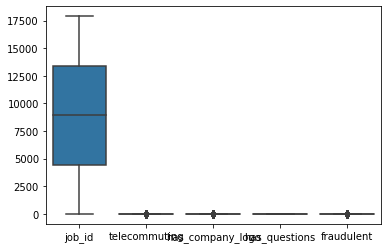

In [10]:
print('BOXPLOT')
ax = sns.boxplot(data = df[['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']], orient ='v')

# fill missing value using fillna

In [11]:
df['employment_type'] = df['employment_type'].fillna(value='unknown')
df['required_experience'] = df['required_experience'].fillna(value='Any')
df['required_education'] = df['required_education'].fillna(value='Any')
df['industry'] = df['industry'].fillna(value='unknown')
df['function'] = df['function'].fillna(value='other')

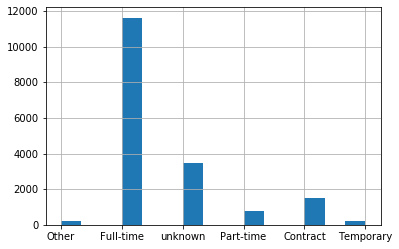

In [34]:
df['employment_type'].hist(bins=15)

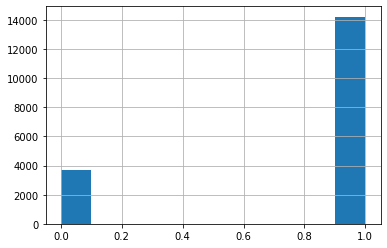

In [30]:
df['has_company_logo'].hist()

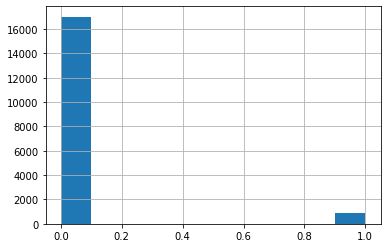

In [32]:
df['fraudulent'].hist()

In [38]:
df.corr()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


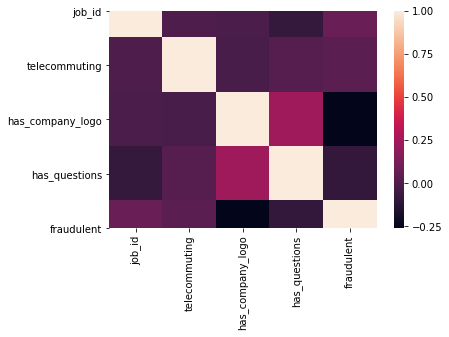

In [40]:
sns.heatmap(df.corr())

# FEATURE ENGINERING

In [12]:

cols = ["title", "company_profile", "description", "requirements", "benefits"]
for c in cols:
    df[c] = df[c].fillna("")

def extract_features(df):    
    for c in cols:
        df[c+"_len"] = df[c].apply(lambda x : len(str(x)))
        df[c+"_wc"] = df[c].apply(lambda x : len(str(x.split())))

    
extract_features(df)

# Create TF IDF Features

In [13]:

from sklearn.feature_extraction.text import TfidfVectorizer
df['combined_text'] = df['company_profile'] + " " + df['description'] + " " + df['requirements'] + " " + df['benefits']

n_features = {
    "title" : 100,
    "combined_text" : 500
}

for c, n in n_features.items():
    tfidf = TfidfVectorizer(max_features=n, norm='l2', stop_words = 'english')
    tfidf.fit(df[c])
    tfidf_train = np.array(tfidf.transform(df[c]).toarray(), dtype=np.float16)

    for i in range(n_features[c]):
        df[c + '_tfidf_' + str(i)] = tfidf_train[:, i]

# One Hot Encoding for Categorical Columns

In [13]:

cat_cols = ["employment_type", "required_experience", "required_education", "industry", "function"]
for c in cat_cols:
    encoded = pd.get_dummies(df[c])
    df = pd.concat([df, encoded], axis=1)

# for the sake of modelling we will Drop Text columns which can't be converted 

In [14]:

drop_cols = ['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'combined_text']
drop_cols += cat_cols
df = df.drop(drop_cols, axis = 1)
df.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,title_len,title_wc,company_profile_len,company_profile_wc,description_len,...,Purchasing,Quality Assurance,Research,Sales,Science,Strategy/Planning,Supply Chain,Training,Writing/Editing,other
0,1,0,1,0,0,16,23,885,1309,905,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,41,60,1286,1745,2077,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,39,52,879,1302,355,...,0,0,0,0,0,0,0,0,0,1
3,4,0,1,0,0,33,49,614,868,2600,...,0,0,0,1,0,0,0,0,0,0
4,5,0,1,1,0,19,29,1628,2250,1520,...,0,0,0,0,0,0,0,0,0,0


# SCALING AND PREPROCESSING

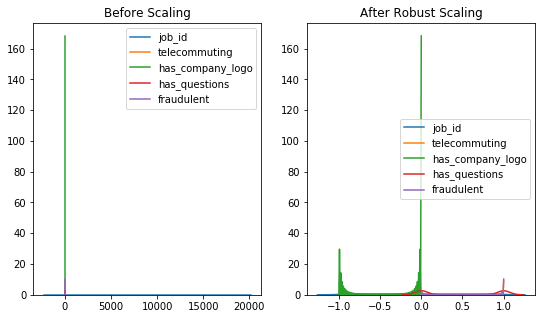

In [15]:

x = pd.DataFrame({
    'job_id': df.job_id,
    'telecommuting': df.telecommuting,
    'has_company_logo': df.has_company_logo,
    'has_questions' : df.has_questions,
    'fraudulent': df.fraudulent
})

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['job_id'], ax=ax1)
sns.kdeplot(x['telecommuting'], ax=ax1)
sns.kdeplot(x['has_company_logo'], ax=ax1)
sns.kdeplot(x['has_questions'], ax=ax1)
sns.kdeplot(x['fraudulent'], ax=ax1)


ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['job_id'], ax=ax2)
sns.kdeplot(robust_scaled_df['telecommuting'], ax=ax2)
sns.kdeplot(robust_scaled_df['has_company_logo'], ax=ax2)
sns.kdeplot(robust_scaled_df['has_questions'], ax=ax2)
sns.kdeplot(robust_scaled_df['fraudulent'], ax=ax2)
plt.show()

# Import modelling libraies 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedKFold
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from xgboost import XGBClassifier


# Selection of independent and dependent variables

In [17]:
df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df.columns]
idd, target = "job_id", "fraudulent"
features = [f for f in df.columns if f not in [idd, target]]

In [18]:
X = df[features]
y = df[target]

# Test and Train Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)

# LOGISTIC REGRESSION
# Build a Simple Logistic Model that identifys if a job is fradulent 

In [20]:
kf = RepeatedKFold(n_splits=3, n_repeats=1, random_state=0)
auc_buf = []   
cnt = 0
for train_index, valid_index in kf.split(X):
    print('Fold {}'.format(cnt + 1))

    train_x,train_y = X.loc[train_index], y.loc[train_index]
    test_x, test_y = X.loc[valid_index], y.loc[valid_index]
    
    clf = LogisticRegression(max_iter = 5000).fit(train_x, train_y)
    preds = clf.predict(test_x)
    
    auc = roc_auc_score(test_y, preds)
    print('{} AUC: {}'.format(cnt, auc))
    auc_buf.append(auc)

    cnt += 1

auc_mean = np.mean(auc_buf)
auc_std = np.std(auc_buf)
print('AUC = {:.6f} +/- {:.6f}'.format(auc_mean, auc_std))

Fold 1
0 AUC: 0.7781376518218623
Fold 2
1 AUC: 0.7455817065012467
Fold 3
2 AUC: 0.7389117153648099
AUC = 0.754210 +/- 0.017137


# Logistic Regression modelling

In [21]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Logistic Regression prediction

In [22]:
Log_y_pred = classifier.predict(X_test)        # Logistic regression

# KNN CLASSIFIER
# Preprocessing-Scaling the features

In [23]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# implementing GridSearch for KNN

In [26]:
# KNN
tuned_parameters = [{'n_neighbors': [1,2,3,4,5,10,], 'p': [1,2]}]
MSE_knn = ['mean_squared_error(y_test,y_pred)']
for i in MSE_knn:
    model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=4)
    model.fit(X_train, y_train)
    y_true, y_pred6 = y_test, model.predict(X_test)
    
print('The best hyper-parameters for KNN are: ', model.best_params_)     

The best hyper-parameters for KNN are:  {'n_neighbors': 2, 'p': 1}


# Modelling with KNN

In [27]:
neigh = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')

# Predict with KNN

In [28]:
KNN_y_pred = neigh.predict(X_test)  

# ADABOOST CLASSIFIER
# Feature Selection and Hyper-Parameter Tuning

In [29]:

tuned_parameters = [{'learning_rate': [0.1,1,2], 'n_estimators': [100,200,300, 400]}]
MSE_ada = ['mean_squared_error(y_test,y_pred3)']
for value in MSE_ada:
    adaclass = GridSearchCV(AdaBoostClassifier(), tuned_parameters, cv=4)
    adaclass.fit(X_train, y_train)
    y_true, y_pred3 = y_test, adaclass.predict(X_test)
    
print('The best hyper-parameters for AdaBoost are: ', adaclass.best_params_ ) 

The best hyper-parameters for AdaBoost are:  {'learning_rate': 1, 'n_estimators': 300}


# Modelling with AdaBoost

In [35]:
adaclass = AdaBoostClassifier(random_state=0, learning_rate = 1, n_estimators=300)
adaclass.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=300, random_state=0)

# Prediction with adaboost

In [36]:
adbst_y_pred = adaclass.predict(X_test)             # AdaBoost

# RANDOM FOREST CLASSIFIER
# Feature Selection and Hyper-Parameter Tuning

In [30]:
tuned_parameters = [{'max_depth': [5,10, 15, 20, 50, 70], 'n_estimators': [10, 25, 50, 100]}]
MSE_rf = ['mean_squared_error(y_test, y_pred5)']
for value in MSE_rf:
    class_rf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=4)
    class_rf.fit(X_train, y_train)
    y_true, y_pred5 = y_test, class_rf.predict(X_test)
    
print('The best hyper-parameters for Random Forests are: ',class_rf.best_params_) 

The best hyper-parameters for Random Forests are:  {'max_depth': 70, 'n_estimators': 50}


# Modelling Random Forests

In [37]:
class_rf = RandomForestClassifier(max_depth=70, random_state=0,
                             n_estimators=50)
class_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=70, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Predcition with Random Forest

In [38]:
rf_y_pred = class_rf.predict(X_test)             # Random Forests prediction

# SVM
# Feature Selection and Hyper-Parameter Tuning

In [34]:
from sklearn.svm import SVC 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['linear', 'rbf', 'poly']}  
  
svm_class = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
svm_class.fit(X_train, y_train)
y_true, y_pred7 = y_test, svm_class.predict(X_test)
# print best parameter after tuning 
print('The best hyper-parameters for SVM are: ',svm_class.best_params_) 

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.969, total=  12.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.7s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.970, total=  13.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.8s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.971, total=  13.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.951, total= 1.8min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.950, total= 1.7min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.951, total= 1.8min
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.980, total=  25.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.982, total=  25.3s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.984, total=  25.8s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 38.9min finished


The best hyper-parameters for SVM are:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


# SVM Modelling

In [39]:
svm_class = SVR(gamma=0.1, kernel = 'rbf', C =10)
svm_class.fit(X_train, y_train) 

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# SVM predict

In [40]:
svm_y_pred = svm_class.predict(X_test)            # SVM

# comparing the classification_report,confusion_matrix, accuracy_score for the different models

In [41]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# CLASSIFICATION REPORT

In [56]:
print ('#LOGISTIC REGRESSION')
print(classification_report(y_test,Log_y_pred )) #LOgistic Regression
print ('#KNN')
print(classification_report(y_test,KNN_y_pred))
print ('#ADABOOST CLASSIFIER')
print(classification_report(y_test,adbst_y_pred))
print ('#RANDOM FOREST CLASSIFIER')
print(classification_report(y_test,rf_y_pred))
print ('#SVM')
print(classification_report(y_test,svm_y_pred.round()))

#LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5137
           1       0.85      0.47      0.60       227

    accuracy                           0.97      5364
   macro avg       0.91      0.73      0.79      5364
weighted avg       0.97      0.97      0.97      5364

#KNN
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5137
           1       0.85      0.69      0.76       227

    accuracy                           0.98      5364
   macro avg       0.92      0.84      0.87      5364
weighted avg       0.98      0.98      0.98      5364

#ADABOOST CLASSIFIER
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5137
           1       0.64      0.54      0.59       227

    accuracy                           0.97      5364
   macro avg       0.81      0.76      0.79      5364
weighted avg       0.97    

# CONFUSION MATRIX

In [57]:
print ('#LOGISTIC REGRESSION')
print(confusion_matrix(y_test,Log_y_pred ))
print ('#KNN')
print(confusion_matrix(y_test,KNN_y_pred))
print ('#ADABOOST CLASSIFIER')
print(confusion_matrix(y_test,adbst_y_pred))
print ('#RANDOM FOREST CLASSIFIER')
print(confusion_matrix(y_test,rf_y_pred))
print ('#SVM')
print(confusion_matrix(y_test,svm_y_pred.round()))

#LOGISTIC REGRESSION
[[5118   19]
 [ 121  106]]
#KNN
[[5109   28]
 [  71  156]]
#ADABOOST CLASSIFIER
[[5068   69]
 [ 104  123]]
#RANDOM FOREST CLASSIFIER
[[5133    4]
 [ 113  114]]
#SVM
[[5127   10]
 [  68  159]]


# ACCURACY SCORE

In [58]:
print ('#LOGISTIC REGRESSION')
print(accuracy_score(y_test,Log_y_pred ))
print ('#KNN')
print(accuracy_score(y_test,KNN_y_pred))
print ('#ADABOOST CLASSIFIER')
print(accuracy_score(y_test,adbst_y_pred))
print ('#RANDOM FOREST CLASSIFIER')
print(accuracy_score(y_test,rf_y_pred))
print ('#SVM')
print(accuracy_score(y_test,svm_y_pred.round()))

#LOGISTIC REGRESSION
0.9739000745712155
#KNN
0.9815436241610739
#ADABOOST CLASSIFIER
0.9677479492915735
#RANDOM FOREST CLASSIFIER
0.9781879194630873
#SVM
0.9854586129753915
